<a href="https://colab.research.google.com/github/naufal-01/Smartguard-An-IOT-Based-Snake-Tracking-and-Alert-System/blob/main/snake_guard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img


In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import matplotlib.pyplot as plt

# Define your IMAGE_SIZE, BATCH_SIZE, EPOCHS, and CHANNELS here
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

# Define the directory for the identification dataset
identification_directory = "/content/drive/MyDrive/phase - ii project/Indian-Snakes-Dataset-master/Venomous"

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(directory, image_size, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        seed=123,
        shuffle=True,
        image_size=image_size,
        batch_size=batch_size
    )
    return dataset

# Load and preprocess the identification dataset
dataset1 = load_and_preprocess_dataset(identification_directory, IMAGE_SIZE, BATCH_SIZE)

Found 1780 files belonging to 13 classes.


Found 1780 files belonging to 13 classes.


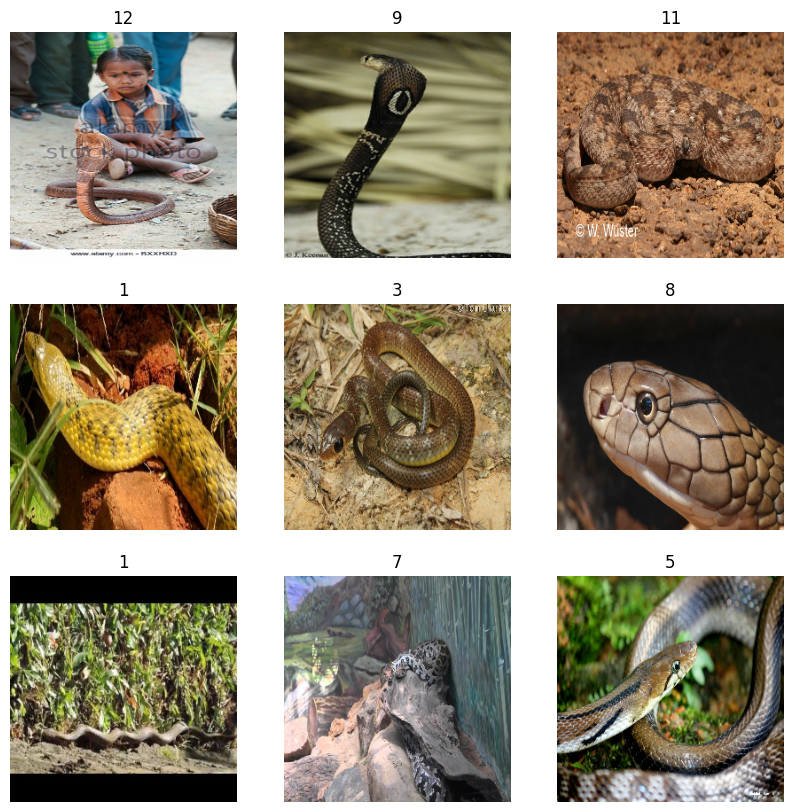

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import matplotlib.pyplot as plt

# Define your IMAGE_SIZE, BATCH_SIZE, EPOCHS, and CHANNELS here
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

# Define the directory for the identification dataset
identification_directory = "/content/drive/MyDrive/phase - ii project/Indian-Snakes-Dataset-master/Venomous"

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(directory, image_size, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        seed=123,
        shuffle=True,
        image_size=image_size,
        batch_size=batch_size
    )
    return dataset

# Load and preprocess the identification dataset
dataset1 = load_and_preprocess_dataset(identification_directory, IMAGE_SIZE, BATCH_SIZE)

# Function to print the dataset
def print_dataset(dataset, num_batches=1):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(num_batches):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
    plt.show()

# Print the dataset
print_dataset(dataset1, num_batches=1)


In [ ]:
print(dataset1)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import matplotlib.pyplot as plt

# Define your IMAGE_SIZE, BATCH_SIZE, EPOCHS, and CHANNELS here
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

# Define the directory for the identification dataset
identification_directory = "/content/drive/MyDrive/phase - ii project/Indian-Snakes-Dataset-master/Venomous"

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(directory, image_size, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        seed=123,
        shuffle=True,
        image_size=image_size,
        batch_size=batch_size
    )
    return dataset

# Load and preprocess the identification dataset
dataset1 = load_and_preprocess_dataset(identification_directory, IMAGE_SIZE, BATCH_SIZE)

# Define the model architecture
model1 = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(dataset1.class_names), activation='softmax')
])

# Compile the model
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history1 = model1.fit(
    dataset1,
    batch_size=BATCH_SIZE,
    validation_data=dataset1,  # Validation data same as training data for simplicity
    verbose=1,
    epochs=EPOCHS
)

# Evaluate the model
model1.evaluate(dataset1)

# Plot training history
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Save the trained identification model
identification_model_path = "/content/drive/MyDrive/phase - ii project/identification_model.h5"
model1.save(identification_model_path)
print("Identification model saved successfully at:", identification_model_path)


Found 1780 files belonging to 13 classes.
Epoch 1/20
56/56 [==============================] - 415s 7s/step - loss: 2.4821 - accuracy: 0.1331 - val_loss: 2.4457 - val_accuracy: 0.1354
Epoch 2/20
56/56 [==============================] - 405s 7s/step - loss: 2.4291 - accuracy: 0.1326 - val_loss: 2.3584 - val_accuracy: 0.1764
Epoch 3/20
56/56 [==============================] - 400s 7s/step - loss: 2.3796 - accuracy: 0.1624 - val_loss: 2.3273 - val_accuracy: 0.2174
Epoch 4/20
56/56 [==============================] - 403s 7s/step - loss: 2.3286 - accuracy: 0.1848 - val_loss: 2.2478 - val_accuracy: 0.2124
Epoch 5/20
56/56 [==============================] - 395s 7s/step - loss: 2.2898 - accuracy: 0.1899 - val_loss: 2.1569 - val_accuracy: 0.2511
Epoch 6/20
56/56 [==============================] - 402s 7s/step - loss: 2.1906 - accuracy: 0.2483 - val_loss: 2.0684 - val_accuracy: 0.3309
Epoch 7/20
56/56 [==============================] - 395s 7s/step - loss: 2.0917 - accuracy: 0.2691 - val_loss: 1

In [ ]:
# Load the saved model

loaded_model1 = tf.keras.models.load_model(identification_model_path)
print("Identification model loaded successfully.")

# Predict on an example image using the loaded model
example_image_path = "/content/drive/MyDrive/phase - ii project/yolov7/runs/train/detect/exp39/cropped/Venomous_Snakes_101_crop_0_Snake.jpg"
image = preprocessing.image.load_img(example_image_path, target_size=IMAGE_SIZE)
image_array = preprocessing.image.img_to_array(image)
scaled_img = tf.expand_dims(image_array, axis=0)
pred1 = loaded_model1.predict(scaled_img)
output1 = dataset1.class_names[np.argmax(pred1)]
print("Prediction using loaded identification model:", output1)


Identification model loaded successfully.
1/1 [==============================] - 0s 495ms/step
Prediction using loaded identification model: King Cobra


In [ ]:
import csv

# Load the CSV lookup table
lookup_table_path = "/content/drive/MyDrive/phase - ii project/sna.csv"

# Function to classify snakes based on the predicted class and the lookup table
def classify_snake(predicted_class, lookup_table_path):
    with open(lookup_table_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['Snake Name'] == predicted_class:
                return int(row['Target variable'])

# Example image path
example_image_path = "/content/drive/MyDrive/phase - ii project/Indian-Snakes-Dataset-master/Venomous/Common Rat Snake/0e07f0ba188cf87784d3c48f54e91ce3.jpg"
# Predict using the loaded identification model
image = preprocessing.image.load_img(example_image_path, target_size=IMAGE_SIZE)
image_array = preprocessing.image.img_to_array(image)
scaled_img = tf.expand_dims(image_array, axis=0)
pred1 = loaded_model1.predict(scaled_img)
predicted_class = dataset1.class_names[np.argmax(pred1)]
print("Predicted class using loaded identification model:", predicted_class)

# Classify the snake as venomous or non-venomous using the lookup table
classification_result = classify_snake(predicted_class, lookup_table_path)
if classification_result == 1:
    print("The identified snake is Venomous.")
else:
    print("The identified snake is Non-Venomous.")

1/1 [==============================] - 0s 18ms/step
Predicted class using loaded identification model: Common Rat Snake
The identified snake is Non-Venomous.
